<a href="https://colab.research.google.com/github/Mahmamad-Rafi/Encryptix/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/Churn.csv.zip"

Archive:  /content/Churn.csv.zip
  inflating: Churn_Modelling.csv     


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7217,7218,15720353,Chiang,553,France,Male,41,1,0.00,2,1,0,90607.31,0
2650,2651,15813439,Ch'ien,587,France,Male,33,5,100116.82,1,1,0,34215.58,0
808,809,15708917,Martin,598,Germany,Male,53,10,167772.96,1,1,1,136886.86,0
7939,7940,15761717,Ch'ien,720,France,Male,26,10,51962.91,2,1,0,45507.24,0
3124,3125,15795224,Wu,760,France,Male,39,6,178585.46,1,1,0,67131.30,1
8261,8262,15570855,Leonard,670,France,Male,38,7,0.00,2,1,1,77864.41,0
8907,8908,15710671,Gordon,786,France,Male,34,3,137361.96,1,0,0,183682.09,0
8542,8543,15647546,Carvosso,688,Germany,Female,40,8,150679.71,2,0,1,196226.38,0
4646,4647,15665008,Sidorov,805,Germany,Female,26,8,42712.87,2,1,1,28861.69,0
5032,5033,15750569,Iweobiegbunam,684,Germany,Female,46,3,102955.14,2,1,0,154137.33,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

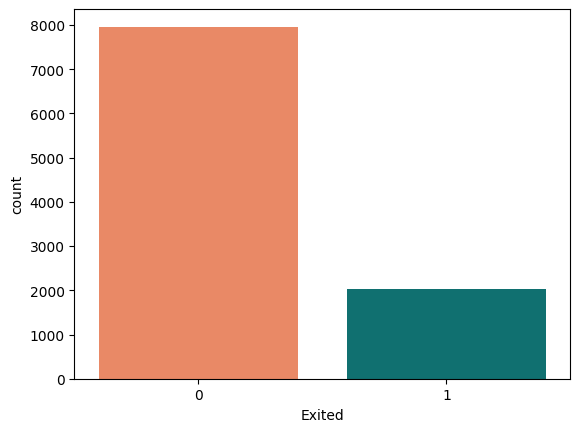

In [ ]:
sns.countplot(x="Exited",data=df,palette=["coral","teal"])
plt.show()

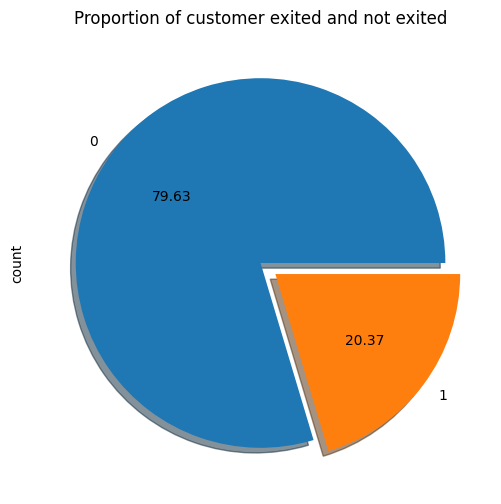

In [ ]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()


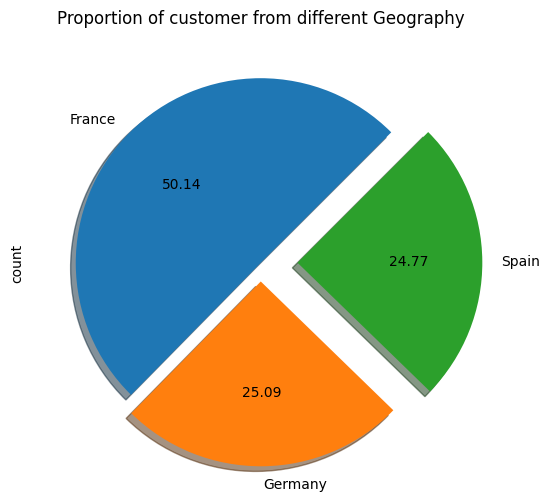

In [ ]:
value_counts = pd.value_counts(df['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

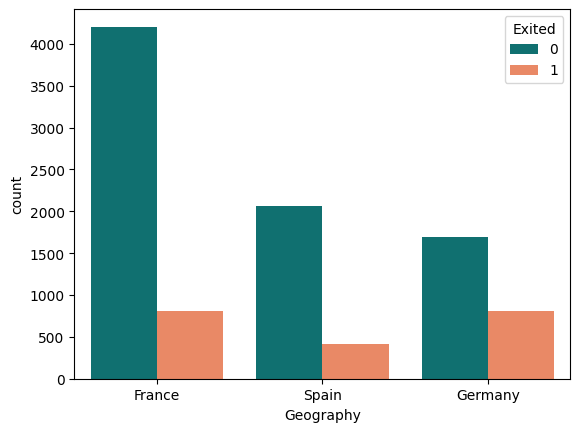

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
sns.countplot(x="Geography",hue="Exited",palette=["Teal","coral"],data=df)
plt.show()
pd.crosstab(df["Geography"],df["Exited"])

<Axes: xlabel='Age', ylabel='Balance'>

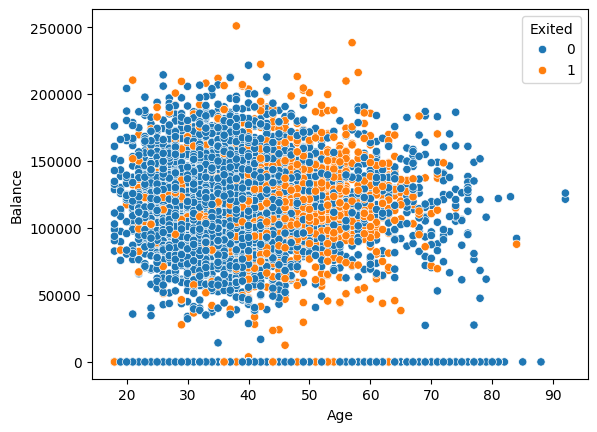

In [ ]:
sns.scatterplot(x ="Age", y ="Balance", hue ="Exited", data = df)

<Axes: xlabel='CreditScore', ylabel='Density'>

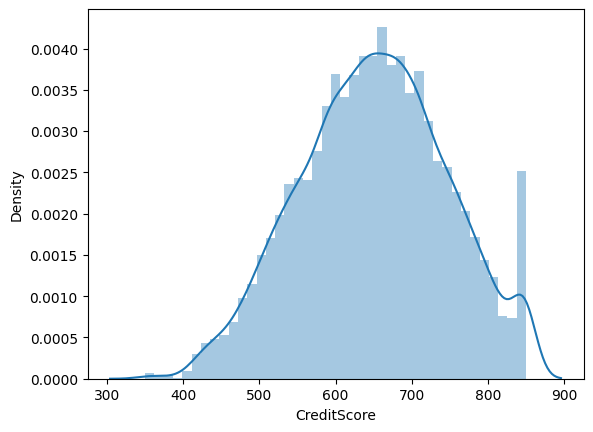

In [ ]:
sns.distplot(df["CreditScore"])

<Axes: >

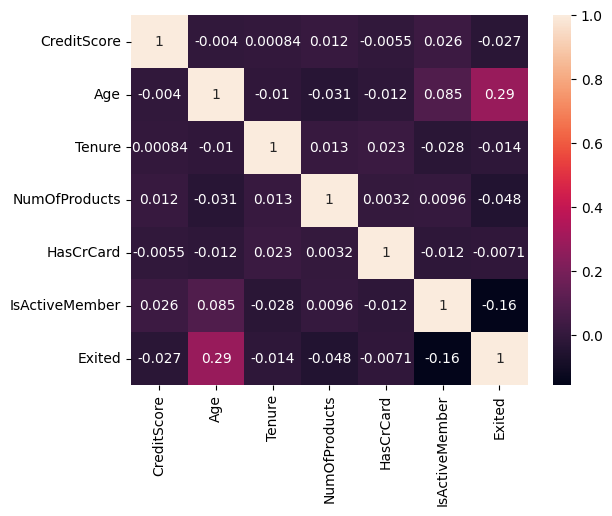

In [ ]:
numerical_columns=df.select_dtypes(include=['int64'])
sns.heatmap(data=numerical_columns.corr(),annot=True)

In [ ]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
Gender_Female           bool
Gender_Male             bool
dtype: object

In [ ]:
df=pd.get_dummies(columns=["Geography","Gender"],data=df)

In [ ]:
x=df.drop("Exited",axis=1)

In [ ]:
y=df["Exited"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
model_1=LogisticRegression()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your original DataFrame
# ... (Your code to create 'x' and 'y' as before)

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the training data and transform both training and testing data
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Now you can fit the model
model_1 = LogisticRegression()
model_1.fit(x_train_encoded, y_train)

LogisticRegression()

In [ ]:
model_1.score(x_train_encoded, y_train)  # Use the encoded data for evaluation

0.9302857142857143

In [ ]:
model_1.score(x_test_encoded,y_test)

0.846

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_2=DecisionTreeClassifier(max_depth=8)

In [ ]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
model_2.score(x_train,y_train)

0.8855714285714286

In [ ]:
model_2.score(x_test,y_test)

0.8536666666666667